Task 3: Data Visualization

Task list:

1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

2. Compare the average ratings of different cuisines or cities using appropriate visualizations.

3. Visualize the relationship between various features and the target variable to gain insights.

In [39]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
new_data = pd.read_csv('new_data.csv')

1. Creating visualizations to represent the distribution of ratings using histogram, bar plot and box plot

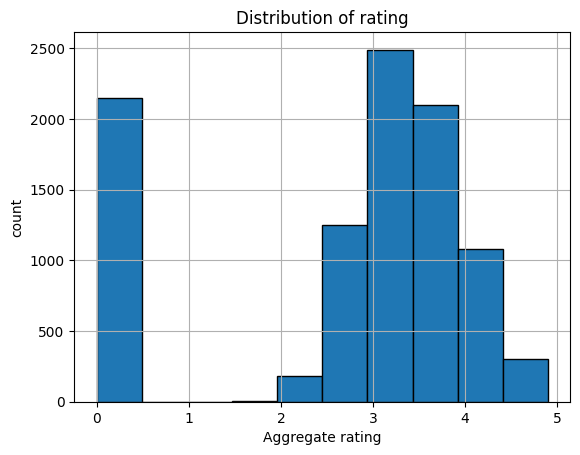

In [41]:
# Distribution of ratings using histogram

ax=new_data['Aggregate rating'].hist()
plt.xlabel('Aggregate rating')
plt.ylabel('count')
plt.title('Distribution of rating')

for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
    
plt.show()

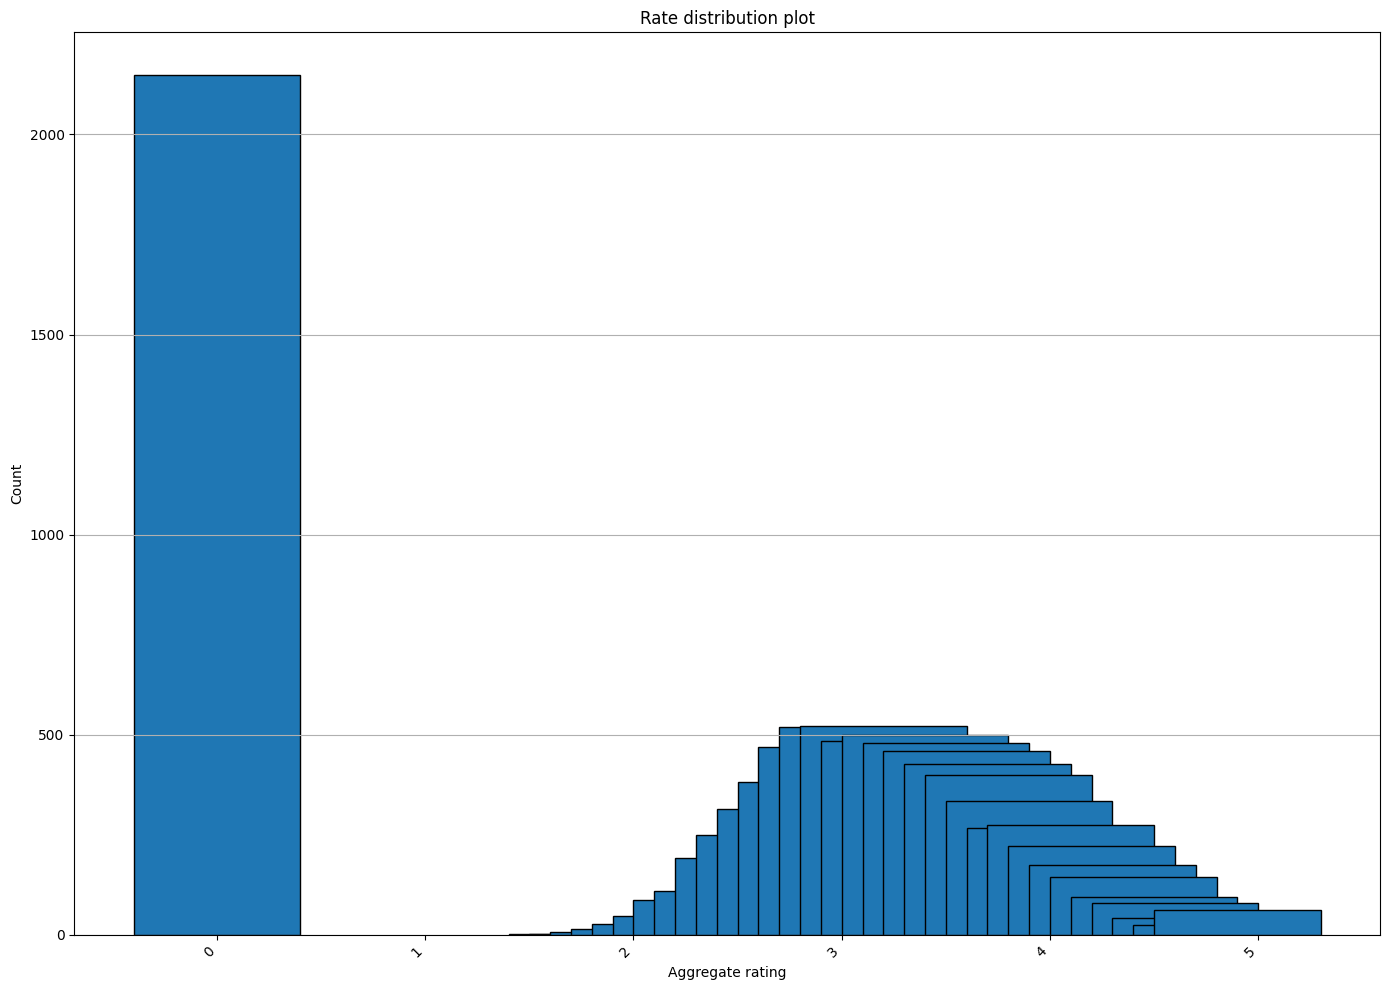

In [62]:

# Distribution of rating using bar plot

Rate_count = new_data.groupby('Aggregate rating')[['Aggregate rating']].value_counts().reset_index(name='Count') # extracting counts of each rate category
plt.figure(figsize=(14, 10))
plt.bar(Rate_count['Aggregate rating'], Rate_count['Count'], edgecolor='black')

plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title('Rate distribution plot')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

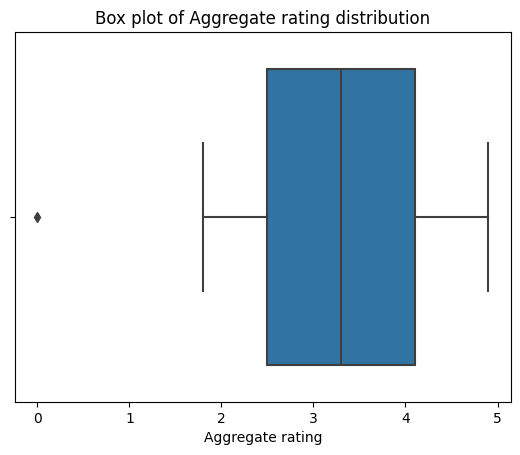

In [64]:
# Distribution of rating using box plot
sns.boxplot(x=Rate_count['Aggregate rating'])

plt.xlabel('Aggregate rating')
plt.title('Box plot of Aggregate rating distribution')
plt.show()

The different visualizations explains the presence of outliers which in this case is more concentrated to the left of the rating scale.  These outliers are below the average customer rating and they are also high in their concentration giving a clear indication of the high presence of customer disatisfaction compared to fewer high rate of satisfaction which is something to be addressed.

However, outside the outliers, the distribution of the ratings of customers suggests suggests more pronouncement of low ratings than higher ratings.

2a. Comparing the average ratings of different cuisines using bar plot.

In [44]:
# Extracting records of unique cuisines based on rating
cuisine_ratings = new_data.groupby('Cuisines')['Aggregate rating'].mean().reset_index(name='Average Aggregate rating').sort_values(ascending=False, by='Average Aggregate rating')
cuisine_ratings

,Cuisines,Average Aggregate rating
1062,"Italian, Deli",4.9
949,"Hawaiian, Seafood",4.9
93,"American, Sandwich, Tea",4.9
683,"Continental, Indian",4.9
796,"European, Asian, Indian",4.9
...,...,...
850,"Fast Food, Desserts, Beverages",0.0
844,"Fast Food, Chinese, Burger",0.0
415,"Cafe, French",0.0
1687,"Seafood, Mughlai, North Indian",0.0


There are 1825 observations which would lead to over crowding of the distribution when creating the visualization.  Instead the data will be segmented into 20s of observations for better clarification.

In [45]:
first_20_cuisine_ratings = cuisine_ratings[0:20]

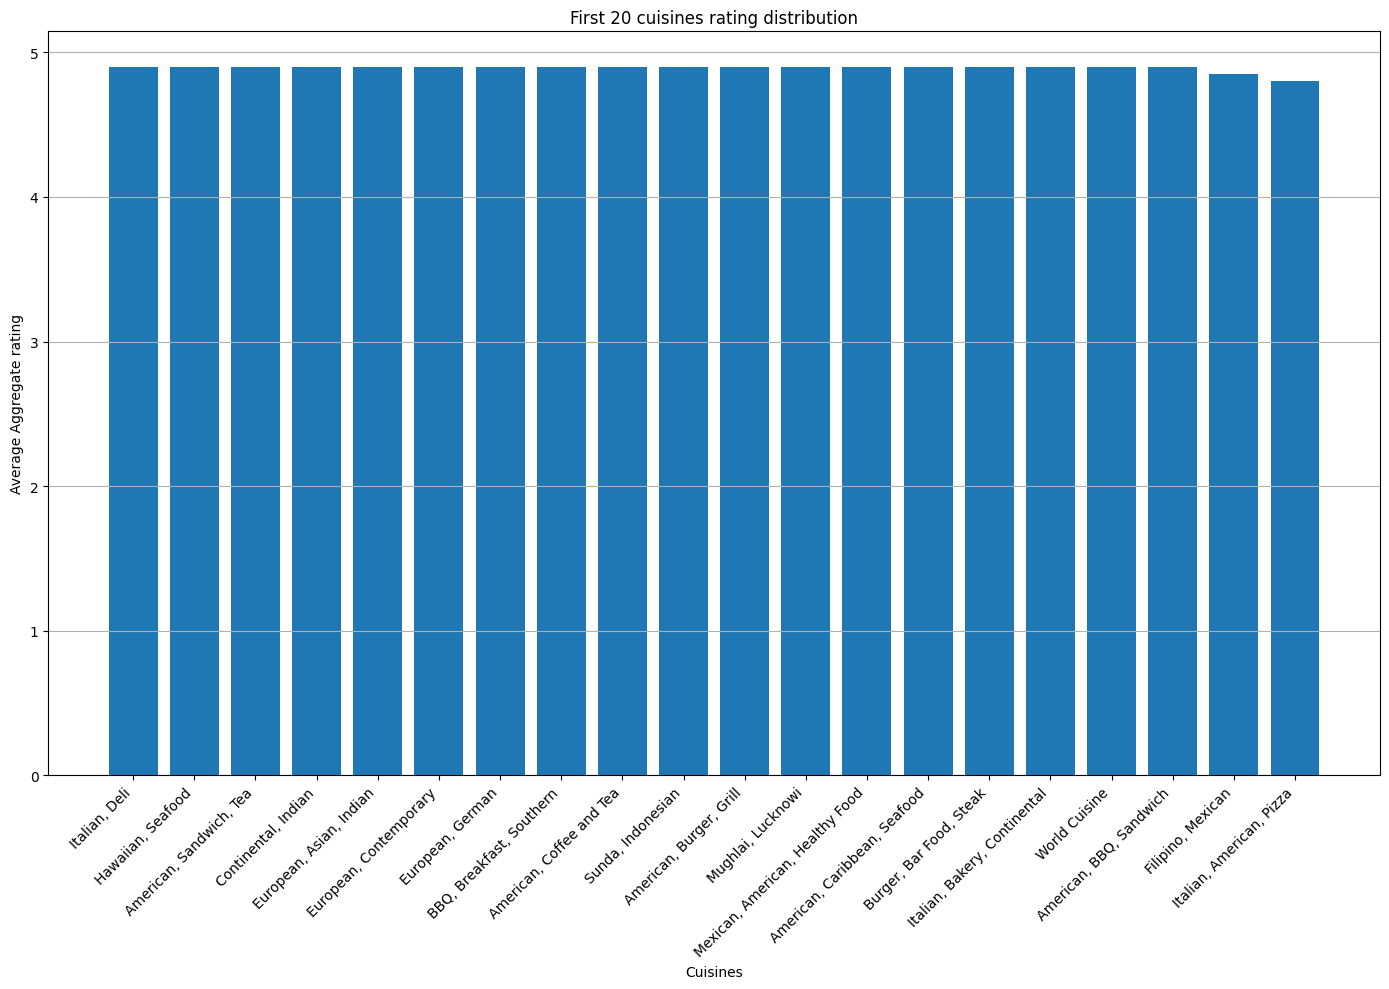

In [46]:
# Visualizing the first 20 cuisines and their respective rating using a bar plot
plt.figure(figsize=(14, 10))
plt.bar(first_20_cuisine_ratings['Cuisines'], first_20_cuisine_ratings['Average Aggregate rating'])

plt.xlabel('Cuisines')
plt.ylabel('Average Aggregate rating')
plt.title('First 20 cuisines rating distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

From the distribution above, the first 17 top cuisines possess the 4.9 highest rating and it starts dropping after "American, BBQ, Sandwich".  Any other cuisines coming after this cuisine are less than 4.9 rating

2b. Comparing the average ratings of different cities using bar plot.

In [47]:
# Extracting records of rating based on cities
city_ratings = new_data.groupby('City')['Aggregate rating'].mean().reset_index(name='Average Aggregate rating').sort_values(ascending=False, by='Average Aggregate rating')
city_ratings

,City,Average Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
...,...,...
88,New Delhi,2.438845
83,Montville,2.400000
78,Mc Millan,2.400000
89,Noida,2.036204


In [48]:
city_ratings['Average Aggregate rating'] = city_ratings['Average Aggregate rating'].round(1)
city_ratings

,City,Average Aggregate rating
56,Inner City,4.9
107,Quezon City,4.8
73,Makati City,4.6
95,Pasig City,4.6
75,Mandaluyong City,4.6
...,...,...
88,New Delhi,2.4
83,Montville,2.4
78,Mc Millan,2.4
89,Noida,2.0


There are 141 unique cities which is a lot to include in one visualization plot.  For this reason, it will be segmented in 20s of observations.

In [49]:
# First 20 city observations
first_20_city_ratings =  city_ratings[0:20]
first_20_city_ratings

,City,Average Aggregate rating
56,Inner City,4.9
107,Quezon City,4.8
73,Makati City,4.6
95,Pasig City,4.6
75,Mandaluyong City,4.6
15,Beechworth,4.6
67,London,4.5
123,Taguig City,4.5
122,Tagaytay City,4.5
116,Secunderabad,4.5


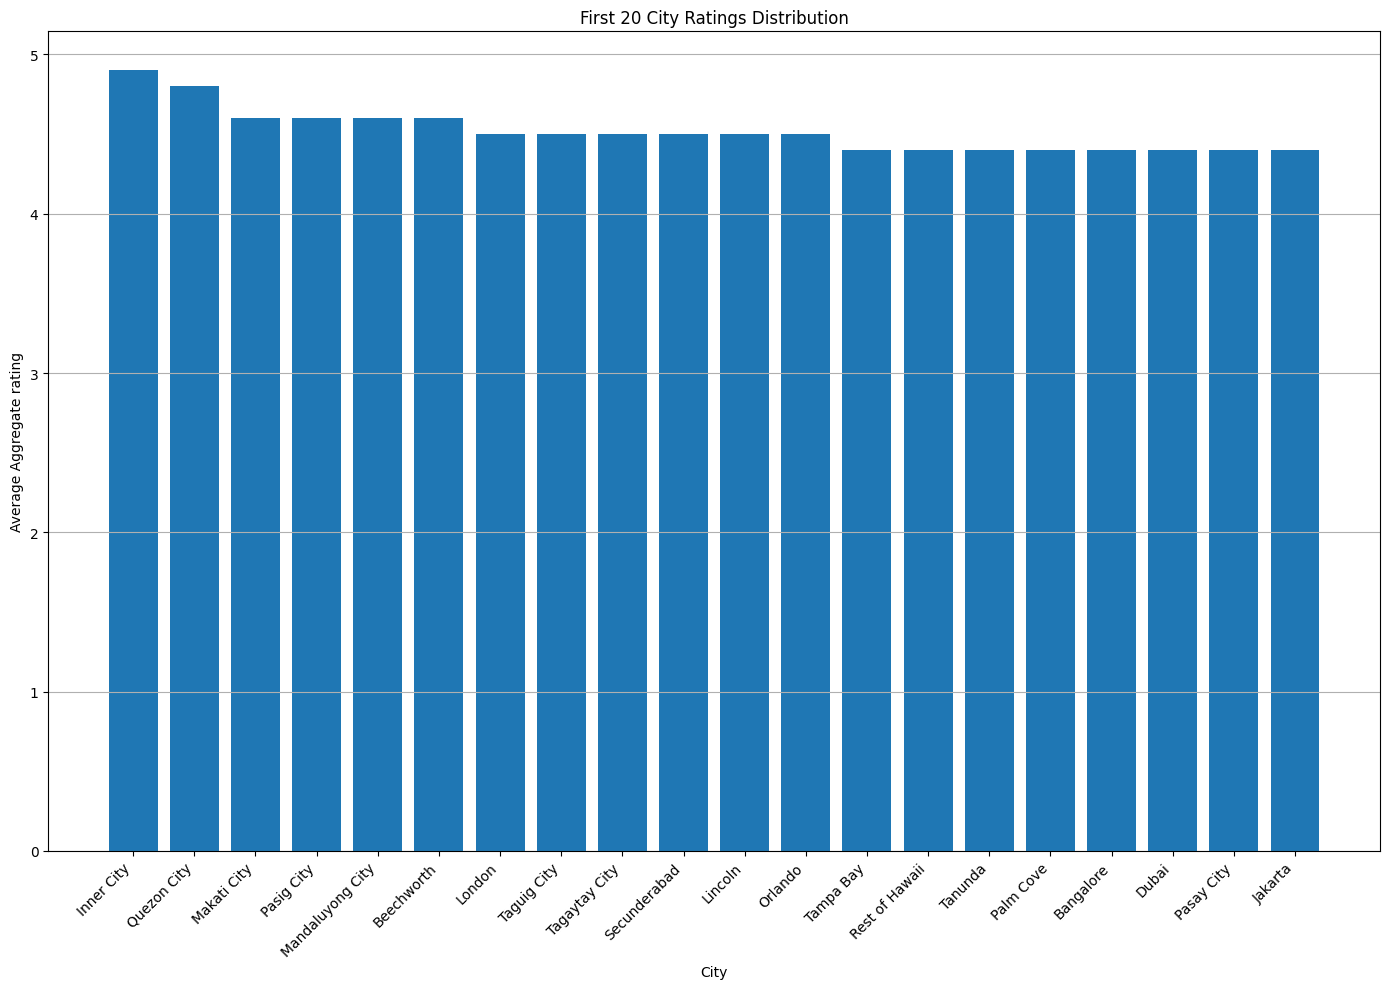

In [50]:
# Visualizing the first 20 cities and their respective rating using a bar plot
plt.figure(figsize=(14, 10))

plt.bar(first_20_city_ratings['City'], first_20_city_ratings['Average Aggregate rating'])
plt.xlabel('City')
plt.ylabel('Average Aggregate rating')
plt.title('First 20 City Ratings Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()



From the above distribution, "Inner City", followed by "Quezon City" has the  highest aggregate rating among all the 141 cities in this study.

3. Visualizing the relationship between various features and the target variable to gain insights.

In [51]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

The features in this study are the independent variables while the target variables are the dependent variables.

The variables "Aggregate rating", "Rating color", "Rating text", and "Votes" are the dependent variables while the rest are the independent variables.

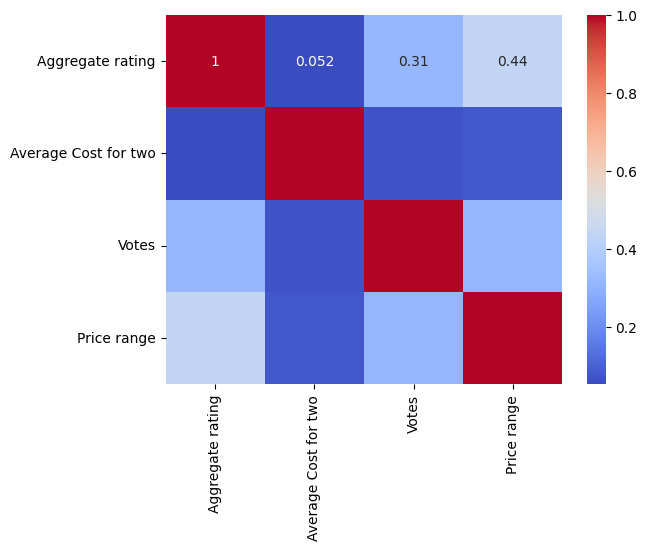

In [52]:
# Exploring how numeric variables such as Aggregate rating, Average Cost for two, Votes, and Price range strongly correlate with each other.  Better accomplished with a heat map.

corr_matrix = new_data[['Aggregate rating', 'Average Cost for two', 'Votes', 'Price range']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

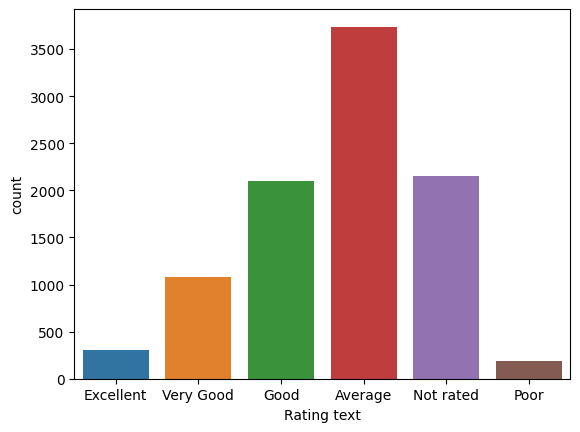

In [53]:
sns.countplot(x='Rating text', data=new_data)
plt.show()

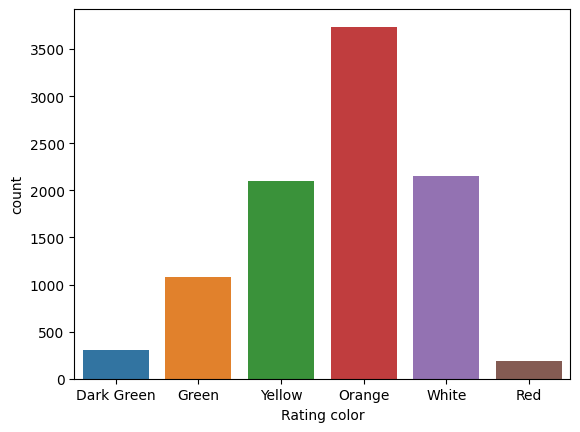

In [54]:
sns.countplot(x='Rating color', data=new_data)
plt.show()

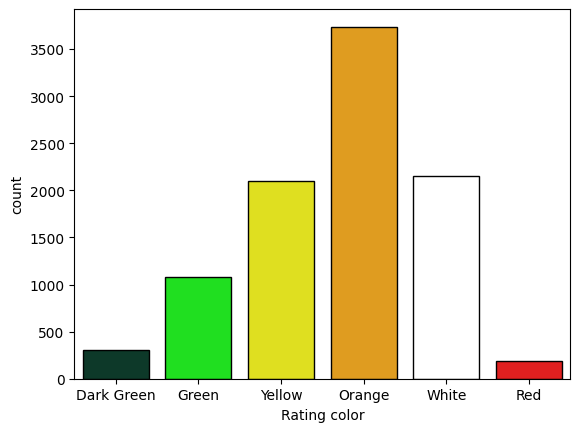

In [55]:
# Creating a dictionary of colors to define the respective colors
color_palette = {
    'Dark Green': '#06402B',
    'Green': '#00FF00',
    'Yellow': '#FFFF00',
    'Orange': '#FFA500',
    'White': '#FFFFFF',
    'Red': '#FF0000'
}

# Create the count plot with the specified palette
ax = sns.countplot(x='Rating color', data=new_data, palette=color_palette)

# Add borders to the bars
for bar in ax.patches:
    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)        # Set the border width

# Display the plot
plt.show()

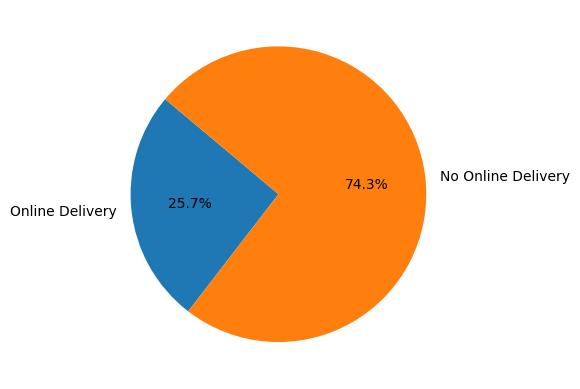

In [67]:
new_data_online_delivery = new_data[new_data['Has Online delivery'] == 'Yes']
new_data_no_online_delivery = new_data[new_data['Has Online delivery'] == 'No']
online_delivery_labels = ['Online Delivery', 'No Online Delivery']
online_delivery_values = [len(new_data_online_delivery), len(new_data_no_online_delivery)]
plt.pie(online_delivery_values, labels=online_delivery_labels, autopct='%1.1f%%', startangle=140)
plt.show()


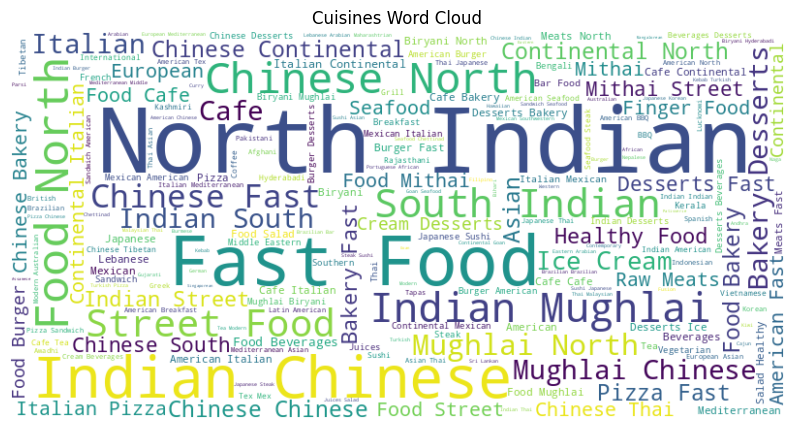

In [57]:
from wordcloud import WordCloud

text = ' '.join(new_data['Cuisines'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisines Word Cloud')
plt.show()
